The purpose of this project is to optimize a model that can predict if a customer will leave Beta Bank. The data will be preprocessed and then several different models will be tested along with several optimization techniques in order to produce a model with an F1 score of 0.59 or above.

In [1]:
# Load all libraries.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve



%matplotlib inline

In [2]:
pip install -U imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
#Load the dataset
df = pd.read_csv('/datasets/Churn.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
# Several categories would not have any practical effect on behaviors. These features can be discarded.

df = df.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#All missing values can be dropped since missing values comprise a very small percentage of the data.
df = df.dropna()

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


0    7237
1    1854
Name: Exited, dtype: int64

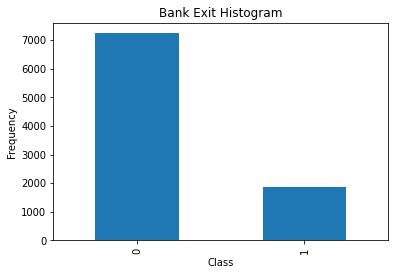

In [12]:
# Rare outcomes are determined.
pd.value_counts(df['Exited']).plot.bar()
plt.title('Bank Exit Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Exited'].value_counts()

In [13]:
# Use OHE to prepare categorical features.

df = pd.get_dummies(df, drop_first=True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [15]:
# Split data into 3 portions; 80% for training, 10% for validation, and 10% for testing.

df_train, df_rem = train_test_split(df, train_size = 0.8, random_state=54321)
df_valid, df_test = train_test_split(df_rem, train_size = 0.5, random_state=54321)

In [16]:
# Define features and target for training set, validation set, and test set.

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [17]:
# All numerical categories will be scaled.
scaler = StandardScaler().fit(features_train)
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numerical_columns])
features_train[numerical_columns] = scaler.transform(features_train[numerical_columns])
features_valid[numerical_columns] = scaler.transform(features_valid[numerical_columns])
features_test[numerical_columns] = scaler.transform(features_test[numerical_columns])

In [18]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6430,0.273178,0.105133,-0.685489,0.829047,-0.921275,1,0,1.188974,0,1,0
1636,-0.819088,-0.181207,0.353460,-1.236125,0.807186,1,0,1.629353,0,0,0
2878,-1.713706,-0.276653,-1.378121,1.017855,-0.921275,1,0,1.630708,0,1,0
4434,-0.194936,0.677812,-0.685489,-1.236125,0.807186,1,0,0.347609,0,1,0
4754,0.585254,1.918616,-1.031805,-1.236125,-0.921275,1,0,1.380421,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9106,0.481229,1.250491,1.738724,0.489769,2.535647,1,0,-1.241765,1,0,1
1316,2.062414,-0.753885,-0.339173,-1.236125,0.807186,1,1,-1.167436,0,0,0
4636,-0.340571,-0.753885,-1.031805,-0.333545,0.807186,0,0,-1.704518,1,0,0
5236,0.512436,-0.944778,-1.031805,-1.236125,0.807186,1,0,1.332979,0,0,1


In [19]:
features_valid

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4399,0.189958,0.582365,1.392408,0.451586,-0.921275,1,0,0.967604,0,0,0
5285,-2.764362,1.345937,-1.378121,0.886253,-0.921275,1,1,-0.655887,0,1,0
8645,-0.163728,-1.803797,1.738724,0.762595,-0.921275,0,0,0.005490,0,0,0
6987,-1.245592,2.014062,0.007143,-0.002380,0.807186,0,1,-1.501028,0,0,1
6244,0.189958,-1.803797,-0.339173,-1.236125,0.807186,1,0,0.339069,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3914,0.065127,0.486919,-1.031805,1.472378,-0.921275,1,1,-1.496005,0,0,1
6901,-1.505655,-0.753885,-1.724437,0.483942,-0.921275,0,1,-0.977668,0,0,0
4343,-1.068749,1.441384,0.007143,0.257723,-0.921275,1,0,-1.696911,1,0,1
2241,0.304386,0.296026,-0.685489,0.665015,0.807186,1,0,-1.578144,1,0,1


In [20]:
features_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9971,1.885571,-0.467546,-0.685489,1.092077,-0.921275,0,0,1.150989,0,0,0
1047,0.772500,0.868705,-0.339173,-1.236125,-0.921275,1,0,0.239318,0,0,0
1349,-0.798283,0.391472,-0.685489,-1.236125,-0.921275,1,0,-0.289503,0,1,1
9375,0.075530,0.868705,-0.339173,0.751760,0.807186,1,0,-0.309064,1,0,1
4593,-0.194936,0.486919,0.699776,-1.236125,0.807186,1,0,-1.225167,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6201,-0.413389,0.200579,0.007143,-1.236125,2.535647,0,0,0.886512,0,0,1
1645,-1.516058,0.200579,-0.685489,-0.307336,-0.921275,1,0,-1.672303,1,0,0
3261,-0.392584,1.155044,-0.685489,-1.236125,0.807186,1,1,-1.645938,0,0,1
6896,-0.579830,0.296026,0.699776,-1.236125,0.807186,1,1,0.370514,0,0,1


In [21]:
# RandomForestClassifier method

best_score = 0
best_est = 0
best_depth = 0
list = [10, 20, 50, 100, 150, 200]
#loop in a loop
for depth in range (1,11):
    for est in list:
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) #max depth
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid) 
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
print("F1 score of the best model on the valid set (n_estimators = {}, depth = {}): {}".format(est, depth, score))

F1 score of the best model on the valid set (n_estimators = 200, depth = 10): 0.5503355704697986


In [22]:
#LogisticRegression method

model = LogisticRegression(random_state=54321, solver = 'liblinear') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

print('F1:', f1_score(target_test, predicted_test))

F1: 0.2952029520295203


In [23]:
#DecisionTreeClassifier method

for depth in range(1,20):
    model = DecisionTreeClassifier(random_state= 54321, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    
    print("max_depth test = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))
    print("max_depth train = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))
    

max_depth test =  1 : 0.0
max_depth train =  1 : 0.0
max_depth test =  2 : 0.5172413793103449
max_depth train =  2 : 0.5172413793103449
max_depth test =  3 : 0.39688715953307385
max_depth train =  3 : 0.39688715953307385
max_depth test =  4 : 0.5211726384364821
max_depth train =  4 : 0.5211726384364821
max_depth test =  5 : 0.5084745762711864
max_depth train =  5 : 0.5084745762711864
max_depth test =  6 : 0.5424836601307189
max_depth train =  6 : 0.5424836601307189
max_depth test =  7 : 0.588957055214724
max_depth train =  7 : 0.588957055214724
max_depth test =  8 : 0.5775075987841946
max_depth train =  8 : 0.5775075987841946
max_depth test =  9 : 0.5645645645645646
max_depth train =  9 : 0.5645645645645646
max_depth test =  10 : 0.5427728613569323
max_depth train =  10 : 0.5427728613569323
max_depth test =  11 : 0.5623188405797102
max_depth train =  11 : 0.5623188405797102
max_depth test =  12 : 0.5498652291105122
max_depth train =  12 : 0.5498652291105122
max_depth test =  13 : 0.525

In [42]:
model = DecisionTreeClassifier(random_state= 54321, max_depth=7)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

print('F1:', f1_score(target_test, predictions_valid))

F1: 0.588957055214724


Depth of 7 is ideal for the DecisionTreeRegressor method.

Out of these 3 models, the highest score is achieved with the RandomForestClassifier model using a depth of 5. We will investigate whether these models can be improved by balancing classes.

In [25]:
# RandomForestClassifier method with balanced classes

best_score = 0
best_est = 0
best_depth = 0
list = [10, 20, 50, 100, 150, 200]
#loop in a loop
for depth in range (1,20):
    for est in list:
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') #max depth
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid) 
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
print("F1 score of the best model on the validation set (n_estimators = {}, depth = {}): {}".format(est, depth, score))

F1 score of the best model on the validation set (n_estimators = 200, depth = 19): 0.5442622950819672


In [26]:
#LogisticRegression method with balanced classes

model = LogisticRegression(random_state=54321, solver = 'liblinear', class_weight='balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4661654135338346


In [27]:
#DecisionTreeClassifier method with balanced classes

for depth in range(1,20):
    model = DecisionTreeClassifier(random_state= 54321, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    
    print("max_depth valid = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))
    print("max_depth train = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

max_depth valid =  1 : 0.47346938775510206
max_depth train =  1 : 0.47346938775510206
max_depth valid =  2 : 0.4870259481037924
max_depth train =  2 : 0.4870259481037924
max_depth valid =  3 : 0.5063829787234042
max_depth train =  3 : 0.5063829787234042
max_depth valid =  4 : 0.5091575091575092
max_depth train =  4 : 0.5091575091575092
max_depth valid =  5 : 0.5753424657534247
max_depth train =  5 : 0.5753424657534247
max_depth valid =  6 : 0.568
max_depth train =  6 : 0.568
max_depth valid =  7 : 0.5617529880478087
max_depth train =  7 : 0.5617529880478087
max_depth valid =  8 : 0.5294117647058824
max_depth train =  8 : 0.5294117647058824
max_depth valid =  9 : 0.5677966101694916
max_depth train =  9 : 0.5677966101694916
max_depth valid =  10 : 0.5565610859728507
max_depth train =  10 : 0.5565610859728507
max_depth valid =  11 : 0.5333333333333333
max_depth train =  11 : 0.5333333333333333
max_depth valid =  12 : 0.5333333333333333
max_depth train =  12 : 0.5333333333333333
max_depth 

In [43]:
model = DecisionTreeClassifier(random_state= 54321, max_depth=5, class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid))

F1: 0.5753424657534247


Depth of 5 is ideal for the DecisionTreeclassifier method with balanced classes. This model is successful in achieving an F1 score above 0.59.

Balanced classes did not improve the LogisticRegression model or the RandomForestClassifier model, but it did improve the DecisionTreeClassifier model. We will further investigate optimizing these models by using oversampling.

In [29]:
sm = SMOTE(random_state=123)
features_train_res, target_train_res = sm.fit_resample(features_train, target_train)

In [30]:
target_train.value_counts()

0    5806
1    1466
Name: Exited, dtype: int64

In [31]:
target_train_res.value_counts()

0    5806
1    5806
Name: Exited, dtype: int64

In [32]:
# RandomForestClassifier method with SMOTE

# RandomForestClassifier method with balanced classes

best_score = 0
best_est = 0
best_depth = 0
list = [10, 20, 50, 100, 150, 200]
#loop in a loop
for depth in range (1,11):
    for est in list:
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') #max depth
        model.fit(features_train_res, target_train_res)
        predicted_valid = model.predict(features_valid) 
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
print("Accuracy of the best model on the valid set (n_estimators = {}, depth = {}): {}".format(est, depth, score))

Accuracy of the best model on the valid set (n_estimators = 200, depth = 10): 0.5686746987951808


In [33]:
model = LogisticRegression(random_state=54321, solver = 'liblinear', class_weight='balanced') 
model.fit(features_train_res, target_train_res)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4627450980392157


In [34]:
#DecisionTreeClassifier method with balanced classes

for depth in range(1,20):
    model = DecisionTreeClassifier(random_state= 54321, max_depth=depth, class_weight='balanced')
    model.fit(features_train_res, target_train_res)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    
    print("max_depth valid = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))
    print("max_depth train = ", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

max_depth valid =  1 : 0.47346938775510206
max_depth train =  1 : 0.47346938775510206
max_depth valid =  2 : 0.4870259481037924
max_depth train =  2 : 0.4870259481037924
max_depth valid =  3 : 0.5063829787234042
max_depth train =  3 : 0.5063829787234042
max_depth valid =  4 : 0.49264705882352944
max_depth train =  4 : 0.49264705882352944
max_depth valid =  5 : 0.5654205607476634
max_depth train =  5 : 0.5654205607476634
max_depth valid =  6 : 0.5247148288973384
max_depth train =  6 : 0.5247148288973384
max_depth valid =  7 : 0.5199161425576521
max_depth train =  7 : 0.5199161425576521
max_depth valid =  8 : 0.5265486725663716
max_depth train =  8 : 0.5265486725663716
max_depth valid =  9 : 0.5024154589371982
max_depth train =  9 : 0.5024154589371982
max_depth valid =  10 : 0.5067873303167421
max_depth train =  10 : 0.5067873303167421
max_depth valid =  11 : 0.48747152619589973
max_depth train =  11 : 0.48747152619589973
max_depth valid =  12 : 0.4794520547945206
max_depth train =  12 :

In [35]:
model = RandomForestClassifier(random_state=54321, n_estimators=est)
model.fit(features_train_res, target_train_res)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5873015873015873


SMOTE did not help increase the F1 scores of these models. For the purpose of this project, the best score is achieved using DecisionTreeClassifier with balanced classes.

In [36]:
model = RandomForestClassifier(random_state=54321, n_estimators=est, class_weight = 'balanced')
model.fit(features_train_res, target_train_res)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, f1 = {:.3f}'.format(
            	threshold, precision, recall, f1
        	)
    	)
    

Threshold = 0.00 | Precision = 0.212, Recall = 1.000, f1 = 0.349
Threshold = 0.02 | Precision = 0.229, Recall = 0.984, f1 = 0.372
Threshold = 0.04 | Precision = 0.248, Recall = 0.979, f1 = 0.396
Threshold = 0.06 | Precision = 0.262, Recall = 0.958, f1 = 0.411
Threshold = 0.08 | Precision = 0.273, Recall = 0.926, f1 = 0.422
Threshold = 0.10 | Precision = 0.283, Recall = 0.911, f1 = 0.432
Threshold = 0.12 | Precision = 0.297, Recall = 0.900, f1 = 0.447
Threshold = 0.14 | Precision = 0.310, Recall = 0.889, f1 = 0.460
Threshold = 0.16 | Precision = 0.329, Recall = 0.879, f1 = 0.479
Threshold = 0.18 | Precision = 0.344, Recall = 0.858, f1 = 0.491
Threshold = 0.20 | Precision = 0.353, Recall = 0.832, f1 = 0.495
Threshold = 0.22 | Precision = 0.372, Recall = 0.816, f1 = 0.511
Threshold = 0.24 | Precision = 0.382, Recall = 0.795, f1 = 0.516
Threshold = 0.26 | Precision = 0.400, Recall = 0.779, f1 = 0.529
Threshold = 0.28 | Precision = 0.411, Recall = 0.753, f1 = 0.532
Threshold = 0.30 | Precis

Threshold adjustment did not achieve a desirable F1 score.

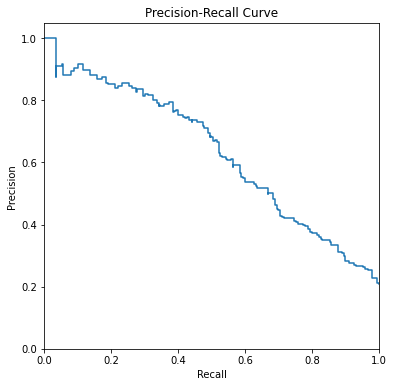

In [38]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:,1])
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

DecisionTreeClassifier with a max_depth of 5 and with balanced classes was one of the best models that were evaluated. We will use this model with the test set to see if an acceptable F1 score can be achieved.

In [44]:
model = DecisionTreeClassifier(random_state= 54321, max_depth=5, class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_test)

print('F1:', f1_score(target_test, predictions_valid))

F1: 0.604206500956023


This model did yield an acceptable F1 score. AUC-ROC value will now be evaluated.

In [45]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8283178391040187

AUC-ROC value indicates a model that is considerably better than a random model. Beta Bank can use the DecisionTreeClassifier model used above with a max_depth of 5 and with balanced classes in order to predict which of their customers are most likely to leave the bank.